# CL_s

Adapted from the pyhf starting tutorial (added plots, scans, etc)

Two bin counting experiment with a background uncertainty

In [1]:
import pyhf
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


Returning the observed and expected $\mathrm{CL}_{s}$

In [2]:
pdf = pyhf.simplemodels.hepdata_like(signal_data=[12.0, 11.0], bkg_data=[50.0, 52.0], bkg_uncerts=[3.0, 7.0])
CLs_obs, CLs_exp = pyhf.utils.hypotest(1.0, [51, 48] + pdf.config.auxdata, pdf, return_expected=True)
#  pyhf.utils.hypotest(poi_test, data, pdf, init_pars=None, par_bounds=None, qtilde=False, **kwargs)[source]
print('Observed: {}, Expected: {}'.format(CLs_obs, CLs_exp))

Observed: [0.05290116], Expected: [0.06445521]


Make a few tries!

- Turn off uncertainties
- Play with the expected signal and background yields
- Play with the observed data yields
- Plot observed and expected as a function of these

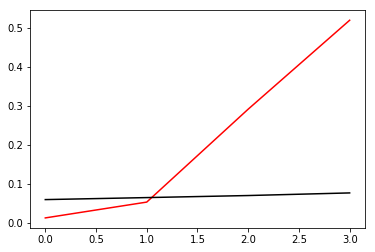

In [4]:
# For example...

CLs_obs=[]
CLs_exp=[]
fix, ax = plt.subplots(1,1)
for obs_data in [ [45, 40], [51, 48], [60, 55], [70, 65]   ]:
    pdf = pyhf.simplemodels.hepdata_like(signal_data=[12.0, 11.0], bkg_data=[50.0, 52.0], bkg_uncerts=[3.0, 7.0])
    iCLs_obs, iCLs_exp = pyhf.utils.hypotest(1.0, obs_data + pdf.config.auxdata, pdf, return_expected=True)
    CLs_obs.extend(iCLs_obs)
    CLs_exp.extend(iCLs_exp)

plt.plot(list(range(0,len(CLs_obs))), CLs_obs, color="red", linestyle="solid")
plt.plot(list(range(0,len(CLs_exp))), CLs_exp, color="black", linestyle="solid")

Returning the observed $\mathrm{CL}_{s}$, $\mathrm{CL}_{s+b}$, **and** $\mathrm{CL}_{b}$

In [5]:
CLs_obs, p_values = pyhf.utils.hypotest(1.0, [51, 48] + pdf.config.auxdata, pdf, return_tail_probs=True)
print('Observed CL_s: {}, CL_sb: {}, CL_b: {}'.format(CLs_obs, p_values[0], p_values[1]))

Observed CL_s: [0.05290116], CL_sb: [0.0236], CL_b: [0.44611493]


A reminder that 
$$
\mathrm{CL}_{s} = \frac{\mathrm{CL}_{s+b}}{\mathrm{CL}_{b}} = \frac{p_{s+b}}{1-p_{b}}
$$

Exercise: for the different tests you did above, plot CL_s, CL_sb, and CL_b

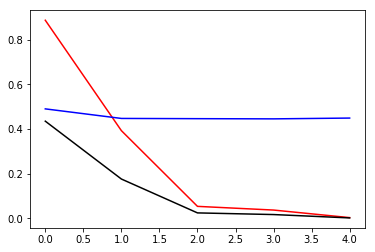

In [6]:
# For example...

CLs=[]
CLsb=[]
CLb=[]
fix, ax = plt.subplots(1,1)
for signal_data in [ [1.0, 0.5], [5.0, 4.8], [12.0, 11.0], [13.0, 12.0], [20.0, 17.0]   ]:
    pdf = pyhf.simplemodels.hepdata_like(signal_data=signal_data, bkg_data=[50.0, 52.0], bkg_uncerts=[3.0, 7.0])
    iCLs_obs, ip_values = pyhf.utils.hypotest(1.0, [51, 48] + pdf.config.auxdata, pdf, return_tail_probs=True)
    CLs.extend(iCLs_obs)
    CLsb.extend(ip_values[0])
    CLb.extend(ip_values[1])

plt.plot(list(range(0,len(CLs))), CLs, color="red", linestyle="solid")
plt.plot(list(range(0,len(CLsb))), CLsb, color="black", linestyle="solid")
plt.plot(list(range(0,len(CLb))), CLb, color="blue", linestyle="solid")

In [7]:
assert CLs_obs == p_values[0]/p_values[1]

Returning the expected $\mathrm{CL}_{s}$ band values

In [8]:
import numpy as np

In [9]:
CLs_obs, CLs_exp_band = pyhf.utils.hypotest(1.0, [51, 48] + pdf.config.auxdata, pdf, return_expected_set=True)
print('Observed CL_s: {}\n'.format(CLs_obs))
for p_value, n_sigma in enumerate(np.arange(-2,3)):
    print(p_value)
    print('Expected CL_s{}: {}'.format('      ' if n_sigma==0 else '({} σ)'.format(n_sigma),CLs_exp_band[p_value]))

Observed CL_s: [0.00245939]

0
Expected CL_s(-2 σ): [1.78750052e-05]
1
Expected CL_s(-1 σ): [0.00026533]
2
Expected CL_s      : [0.0033663]
3
Expected CL_s(1 σ): [0.03170025]
4
Expected CL_s(2 σ): [0.17971959]


Exercise: plot the evolution of the bands for increasing/decreasing background uncertainty (brazilian plot)

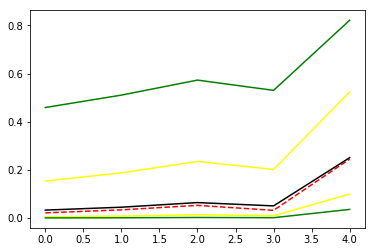

In [11]:
# For example...

obs=[]
exp=[]
exp_m1s=[]
exp_p1s=[]
exp_m2s=[]
exp_p2s=[]
fix, ax = plt.subplots(1,1)
for bkg_uncerts in [ [0.03, 0.01], [1.0, 4.8], [3.0, 7.0], [5, 1.0], [10.0, 20.0]   ]:
    pdf = pyhf.simplemodels.hepdata_like(signal_data=[12.0, 11.0], bkg_data=[50.0, 52.0], bkg_uncerts=bkg_uncerts)
    iCLs_obs, iCLs_exp_band = pyhf.utils.hypotest(1.0, [51, 48] + pdf.config.auxdata, pdf, return_expected_set=True)
    obs.extend(iCLs_obs)
    exp.extend(iCLs_exp_band[2])
    exp_m1s.extend(iCLs_exp_band[1])
    exp_p1s.extend(iCLs_exp_band[3])
    exp_m2s.extend(iCLs_exp_band[0])
    exp_p2s.extend(iCLs_exp_band[4])

plt.plot(list(range(0,len(obs))), obs, color="red", linestyle="dashed")
plt.plot(list(range(0,len(exp))), exp, color="black", linestyle="solid")
plt.plot(list(range(0,len(exp_m1s))), exp_m1s, color="yellow", linestyle="solid")
plt.plot(list(range(0,len(exp_p1s))), exp_p1s, color="yellow", linestyle="solid")
plt.plot(list(range(0,len(exp_m2s))), exp_m2s, color="green", linestyle="solid")
plt.plot(list(range(0,len(exp_p2s))), exp_p2s, color="green", linestyle="solid")

**Returning the test statistics for the observed and Asimov data**

In [38]:
CLs_obs, test_statistics = pyhf.utils.hypotest(1.0, [51, 48] + pdf.config.auxdata, pdf, return_test_statistics=True)
print('q_mu: {}, Asimov q_mu: {}'.format(test_statistics[0], test_statistics[1]))

q_mu: [1.38316876], Asimov q_mu: [1.31798997]
